In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [19]:
df = pd.read_csv('DATASET.csv')
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['time'] = df['time'].dt.strftime("%Y-%m-%d %H:%M")
df.head()

,time,latitude,longitude,mag,depth,nst,gap,dmin
0,1950-09-24 12:23,34.033333,-119.641167,3.22,6.0,5.0,303.0,1.2250
1,1950-09-24 12:31,34.066667,-119.707000,2.74,6.0,2.0,358.0,1.2770
2,1950-09-24 22:56,34.708000,60.422000,5.68,15.0,NaN,NaN,NaN
3,1950-09-25 00:22,33.891000,-115.828333,2.82,6.0,5.0,318.0,1.0160
4,1950-09-25 07:46,33.336833,-116.031500,2.53,6.0,3.0,331.0,0.6959


In [7]:
#neo 
neo = pd.read_csv('D:/Project/Senior-Project-Earthquake-Prediction/NEOsDataset/NEOsq10LDto2050.csv')
neo['cd'] = pd.to_datetime(neo['cd'], format="%Y-%b-%d %H:%M")
neo['cd'] = neo['cd'].dt.strftime("%Y-%m-%d %H:%M")
neo.head()

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,2006 HX30,16,2433401.051,1950-04-29 13:14,0.018397,0.018397,0.018397,4.228013,4.193618,< 00:01,26.20
1,2019 QC4,8,2433517.584,1950-08-24 02:01,0.017833,0.010418,0.076828,9.504365,9.488631,2_17:15,23.50
2,2019 WT3,18,2433624.870,1950-12-09 08:53,0.023066,0.022829,0.023314,10.971436,10.960903,1:08,24.60
3,2021 WA5,4,2433626.124,1950-12-10 14:58,0.003123,0.000953,0.021212,5.407277,5.247145,4_18:50,27.29
4,523685,34,2433627.822,1950-12-12 07:43,0.012014,0.012003,0.012026,9.475064,9.451629,0:03,20.04


In [8]:
neo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
jd,11414.0,2.455787e+06,6968.529420,2.433292e+06,2.454813e+06,2.458201e+06,2.459519e+06,2.469801e+06
dist,11414.0,1.301090e-02,0.007392,4.510000e-05,6.522682e-03,1.314006e-02,1.942834e-02,2.569542e-02
dist_min,11414.0,1.183407e-02,0.007341,0.000000e+00,5.276690e-03,1.145034e-02,1.805841e-02,2.568123e-02
dist_max,11414.0,2.090861e-02,0.029212,4.520000e-05,7.208958e-03,1.488938e-02,2.235471e-02,3.145886e-01
v_rel,11414.0,1.030327e+01,5.087197,2.162878e-01,6.791232e+00,9.404333e+00,1.297686e+01,4.291885e+01
v_inf,11395.0,1.025215e+01,5.098836,2.160225e-01,6.737623e+00,9.363607e+00,1.292801e+01,4.291366e+01
h,11411.0,2.618431e+01,2.115468,1.531000e+01,2.520000e+01,2.640000e+01,2.750000e+01,3.320000e+01


In [20]:
## magnetude > 5.00                 
#filter = dt[(dt['latitude'] > 120) & (dt['longitude'] > 15)
ndt = df[['time','latitude','longitude','mag','depth']]
# at Thailand   ---(ndt['mag']>=3) &
ndt = ndt[(ndt['latitude']<= 20.920) &(ndt['latitude']>=5.6400) & (ndt['longitude']>=96) & (ndt['longitude']<=107)]
ndt

,time,latitude,longitude,mag,depth
11213,1964-07-28 21:38,14.1170,96.0740,6.40,30.000
12501,1965-09-22 04:24,20.6820,99.3260,5.93,35.000
14013,1967-02-14 01:36,13.5550,96.4630,6.75,30.000
20077,1971-03-28 02:54,19.0280,96.2280,5.14,15.000
22423,1972-07-07 12:04,20.5050,98.1940,5.19,15.000
...,...,...,...,...,...
957867,2023-06-21 21:22,15.2265,96.4824,4.40,10.000
957868,2023-06-21 21:58,15.4197,96.3560,4.30,10.000
957876,2023-06-22 00:12,15.4378,96.2622,4.90,13.561
957893,2023-06-22 06:34,15.3774,96.1679,4.10,10.000


In [12]:
ndt.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,349.0,17.665964,2.955606,5.835,15.3763,18.4505,20.031,20.919
longitude,349.0,98.163599,2.124569,96.000,96.2340,97.5710,99.677,105.039
mag,349.0,4.537908,0.538079,2.900,4.2000,4.5000,4.700,6.900
depth,349.0,21.798327,21.574737,5.000,10.0000,13.0200,33.000,252.000


C:\Users\pang0\AppData\Local\Temp\ipykernel_3048\1737937072.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(formatted_time)


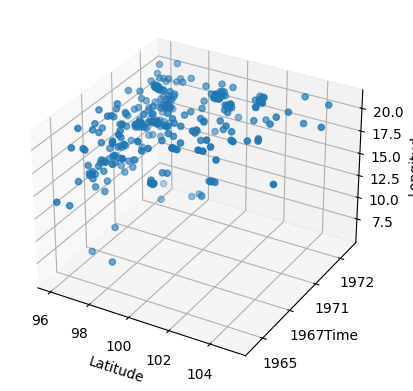

In [21]:
ndt['time'] = pd.to_datetime(ndt['time'])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

formatted_time = ndt['time'].dt.strftime('%Y')

ax.scatter(ndt['longitude'], ndt['time'].astype('int64'), ndt['latitude'], marker='o')
ax.set_xlabel('Latitude')
ax.set_ylabel('Time')  
ax.set_zlabel('Longitude')


ax.set_yticklabels(formatted_time)

plt.show()

In [ ]:
neo['cd'] = pd.to_datetime(neo['cd'], errors='coerce')
ndt['time'] = pd.to_datetime(ndt['time'], errors='coerce')


plt.plot(neo['cd'], neo['dist'], label='neo["dist"]', marker='o')

plt.plot(ndt['time'], ndt['mag'], label='df["mag"]', marker='o')

plt.title('Mag and Distance')
plt.xlabel('Time')
plt.ylabel('Mag')
plt.legend()
plt.grid(True)
plt.show()